# Market Data

In [35]:
# Import packages

# Data Frames
import pandas as pd

# Financial Data 
import yfinance as yf # pip install yfinance

# Dates and Times
import datetime as dt

# Plotting
import matplotlib.pyplot as plt
import mplfinance as mpf # pip install mplfinance

In [ ]:
# Set ticker and get historical data for past 6 months.

ticker = 'AAPL'
market_data = yf.download(ticker, period='6mo', multi_level_index=False)
market_data

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2024-06-27,213.617462,215.253765,211.871406,214.206129,49772700
2024-06-28,210.145279,215.583007,209.826008,215.283680,82542700
2024-07-01,216.261475,217.019756,211.442359,211.611974,60402900
2024-07-02,219.773544,219.883297,214.615199,215.662820,58046200
2024-07-03,221.050659,221.050659,218.536335,219.504150,37369800
...,...,...,...,...,...
2024-12-20,254.490005,255.000000,245.690002,248.039993,147495300
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700


In [66]:
market_data.describe()

,Close,High,Low,Open,Volume
count,128.000000,128.000000,128.000000,128.000000,1.280000e+02
mean,228.640658,230.395262,226.266680,228.203988,4.947664e+07
std,10.496091,10.263141,10.808919,10.510723,2.949030e+07
min,206.762939,209.516729,195.558244,198.641276,9.888202e+06
25%,222.375343,225.066773,220.705907,222.337884,3.690375e+07
50%,226.945168,228.809160,224.722758,227.015097,4.424775e+07
75%,232.527157,233.335753,229.625550,232.476725,5.332138e+07
max,259.019989,260.100006,257.630005,258.190002,3.186799e+08


In [67]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2024-06-27 to 2024-12-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   128 non-null    float64
 1   High    128 non-null    float64
 2   Low     128 non-null    float64
 3   Open    128 non-null    float64
 4   Volume  128 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [68]:
# Timestamp the filename

# Get the current date and time.
filename = dt.datetime.now()
# Create a string format from the current date and time.
filename = filename.strftime("_%Y%m%d_%H%M%S") 
# Prepend data folders, append file extension.
filename = 'data/' + ticker + filename + ".csv"

# Show the filename.
filename

'data/AAPL_20241227_155922.csv'

In [69]:
# Save the data to a CSV file.
market_data.to_csv(filename)

## Plotting Market Data for the specified Ticker ##

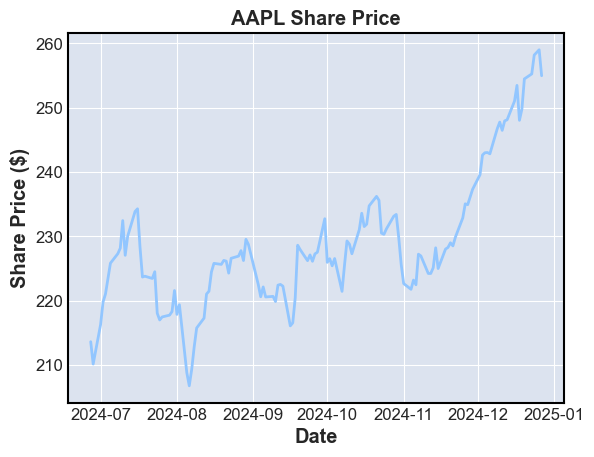

In [70]:
# Plot the Closing prices

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title(ticker + " Share Price", weight='bold')

# Axis labels.
ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('Share Price ($)', weight ='bold')

# Generate plot
ax.plot(market_data["Close"])

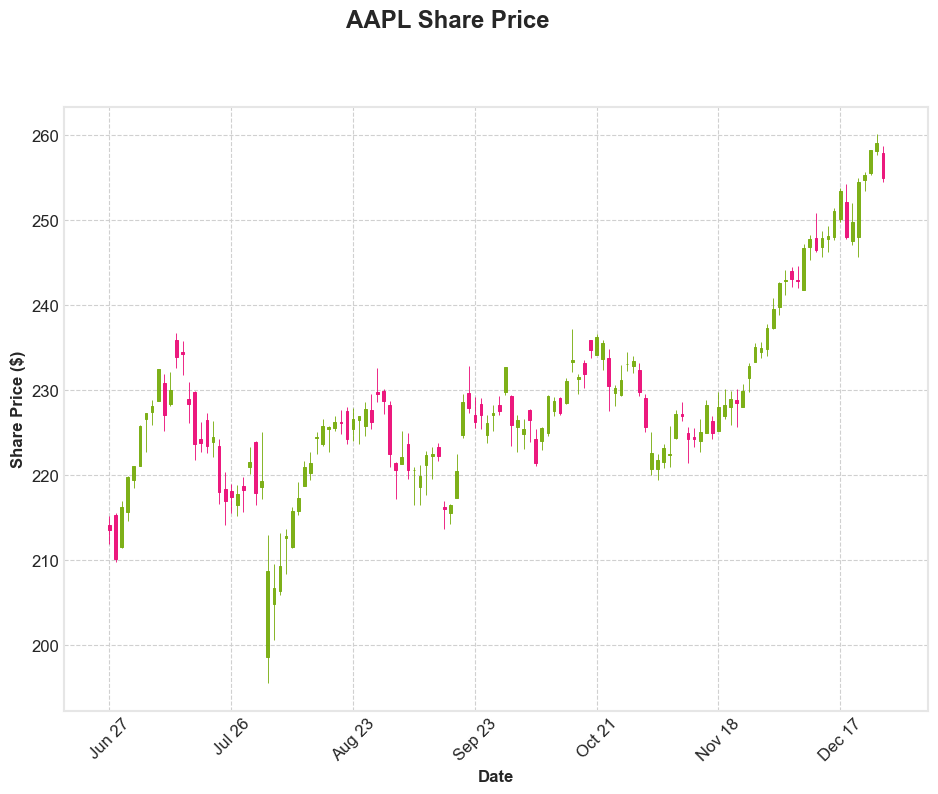

In [ ]:
# Plot open, close, high and low price data on a candlestick chart, using mplfinance.
# https://github.com/matplotlib/mplfinance#tutorials
# https://plainenglish.io/blog/plot-stock-chart-using-mplfinance-in-python-9286fc69689
# Initially experienced an error due to multi-column names. Set this parameter to False during the download:
# https://stackoverflow.com/questions/79133206/mplfinance-error-data-for-column-open-must-be-all-float-or-int

mpf.plot(market_data, type='candle', style='binance', figscale=1.5, 
         title=ticker + " Share Price", ylabel='Share Price ($)', xlabel='Date')

## Trading Strategies ##

### Mean Reversion ###

### Moving Average Crossover ###

In [97]:
# https://paperswithbacktest.com/wiki/yfinance
# https://www.slingacademy.com/article/creating-simple-trading-strategies-with-yfinance-data/
# https://www.datacamp.com/tutorial/finance-python-trading

# Create two look back periods of 5 days (short window) and 20 days (long window).
short_window = 5
long_window = 20

# Create two simple moving average (SMA) calculations and add to market_data Data Frame.
market_data['short_sma'] = market_data['Close'].rolling(window=short_window).mean()
market_data['long_sma'] = market_data['Close'].rolling(window=long_window).mean()

# View the updated market_data Data Frame
market_data



,Close,High,Low,Open,Volume,short_sma,long_sma
Date,,,,,,,
2024-06-27,213.617462,215.253765,211.871406,214.206129,49772700,NaN,NaN
2024-06-28,210.145279,215.583007,209.826008,215.283680,82542700,NaN,NaN
2024-07-01,216.261475,217.019756,211.442359,211.611974,60402900,NaN,NaN
2024-07-02,219.773544,219.883297,214.615199,215.662820,58046200,NaN,NaN
2024-07-03,221.050659,221.050659,218.536335,219.504150,37369800,216.169684,NaN
...,...,...,...,...,...,...,...
2024-12-20,254.490005,255.000000,245.690002,248.039993,147495300,251.369998,243.756998
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800,252.216000,245.026999
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700,253.160004,246.293500


In [98]:
# Add moving average crossover (mac) trading signal

# Initialize mac signal column with all values set to 0.0
market_data['mac_signal'] = 0.0

# Set signal values depending on greater of moving averages. A value of 1 indicates a buy signal, -1 indicates Sell.
market_data['mac_signal'][market_data['short_sma'] > market_data['long_sma']] = 1
market_data['mac_signal'][market_data['short_sma'] > market_data['long_sma']] = -1

market_data




C:\Users\fdennehy\AppData\Local\Temp\ipykernel_19576\3629612577.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  market_data['mac_signal'][market_data['short_sma'] > market_data['long_sma']] = 1
C:\Users\fdennehy\AppData\Local\Temp\ipyker

,Close,High,Low,Open,Volume,short_sma,long_sma,mac_signal
Date,,,,,,,,
2024-06-27,213.617462,215.253765,211.871406,214.206129,49772700,NaN,NaN,0.0
2024-06-28,210.145279,215.583007,209.826008,215.283680,82542700,NaN,NaN,0.0
2024-07-01,216.261475,217.019756,211.442359,211.611974,60402900,NaN,NaN,0.0
2024-07-02,219.773544,219.883297,214.615199,215.662820,58046200,NaN,NaN,0.0
2024-07-03,221.050659,221.050659,218.536335,219.504150,37369800,216.169684,NaN,0.0
...,...,...,...,...,...,...,...,...
2024-12-20,254.490005,255.000000,245.690002,248.039993,147495300,251.369998,243.756998,-1.0
2024-12-23,255.270004,255.649994,253.449997,254.770004,40858800,252.216000,245.026999,-1.0
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700,253.160004,246.293500,-1.0


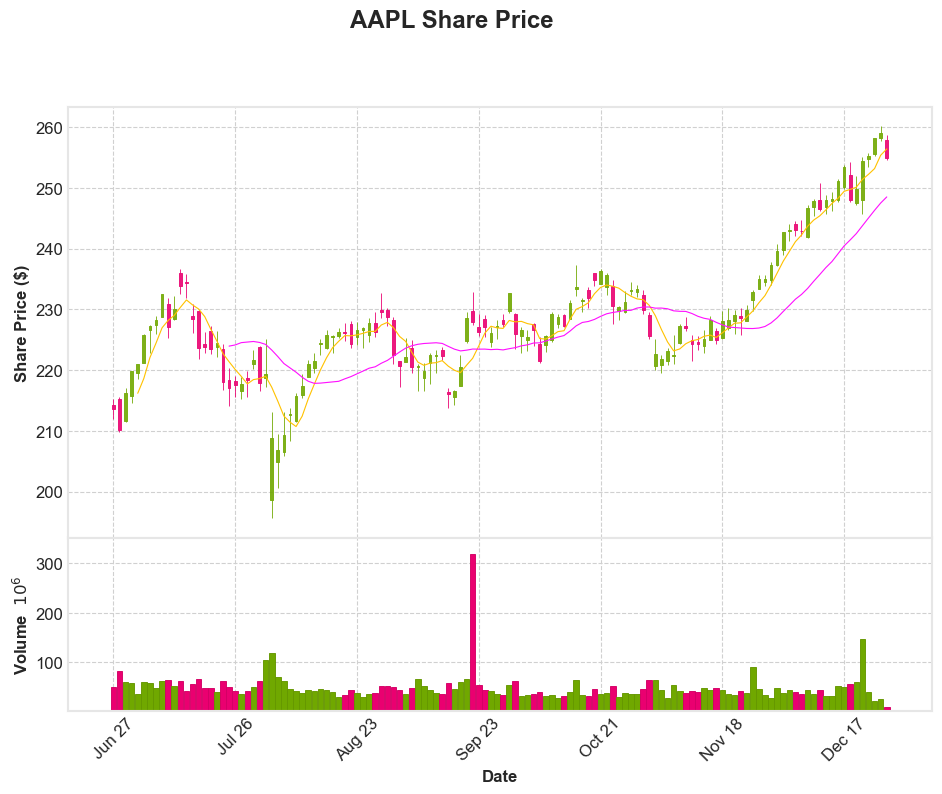

In [96]:
# Add simple moving averages and volume to candlestick chart
# https://plainenglish.io/blog/plot-stock-chart-using-mplfinance-in-python-9286fc69689
# https://stackoverflow.com/questions/71179218/what-kind-of-moving-average-will-be-drawn-when-we-use-mpl-finance-mav-function

mpf.plot(market_data, type='candle', style='binance', mav=(5,20), volume=True, figscale=1.5, 
         title=ticker + " Share Price", ylabel='Share Price ($)', xlabel='Date')

### RSI ###

## Backtesting ##

## End